In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [12]:
data = pd.read_csv("btc_tx_2011_2013.csv") #13- 14 - 15 e bakalim corr var mi hangi featurelar arasi average shortest path length etc.
# flow bazli metrikler
# her biri icin graph olusturulup time seriese bagli graphlar
# makalelerdeki featurelar (stanford 2015 | Group work) aynilarini deneriz
# 100k nodes randomly sampled, multiple times. Per month and closure price, price changing return % 
# pearson spearman corrs

In [13]:
data.head()

,0437cd7f8525ceed2324359c2d0ba26006d92d856a9c20fa0241106ee5a597c9,f4184fc596403b9d638783cf57adfe4c75c605f6356fbc91338530e9831e9e16,2009-01-09 03:54:39,50.0
0,f4184fc596403b9d638783cf57adfe4c75c605f6356fbc...,ea44e97271691990157559d0bdd9959e02790c34db6c00...,2009-01-12 03:30:25,10.0
1,f4184fc596403b9d638783cf57adfe4c75c605f6356fbc...,a16f3ce4dd5deb92d98ef5cf8afeaf0775ebca408f708b...,2009-01-12 03:30:25,40.0
2,a16f3ce4dd5deb92d98ef5cf8afeaf0775ebca408f708b...,591e91f809d716912ca1d4a9295e70c3e78bab077683f7...,2009-01-12 06:02:13,30.0
3,591e91f809d716912ca1d4a9295e70c3e78bab077683f7...,298ca2045d174f8a158961806ffc4ef96fad02d71a6b84...,2009-01-12 06:12:16,1.0
4,591e91f809d716912ca1d4a9295e70c3e78bab077683f7...,12b5633bad1f9c167d523ad1aa1947b2732a865bf5414e...,2009-01-12 06:12:16,29.0


In [14]:
data.columns = ["tx_hash_from","tx_hash_to","datetime","amount_bitcoins"]

In [5]:
data.describe()

,amount_bitcoins
count,6.619907e+07
mean,2.513518e+01
std,8.719734e+02
min,0.000000e+00
25%,1.047785e-02
50%,1.000000e-01
75%,1.286452e+00
max,5.000000e+05


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66199072 entries, 0 to 66199071
Data columns (total 4 columns):
 #   Column           Dtype  
---  ------           -----  
 0   tx_hash_from     object 
 1   tx_hash_to       object 
 2   datetime         object 
 3   amount_bitcoins  float64
dtypes: float64(1), object(3)
memory usage: 2.0+ GB


In [7]:
data.shape

(66199072, 4)

In [8]:
#data.plot() # takes long time | more than 20 mins without cable charging

In [28]:
row_amount = 50
G=nx.from_pandas_edgelist(data.head(row_amount),source="tx_hash_from",target ="tx_hash_to", edge_attr="amount_bitcoins", create_using=nx.DiGraph())
                                 

In [29]:
nx.write_gpickle(G,"first_graph_{}.gpickle".format(row_amount))

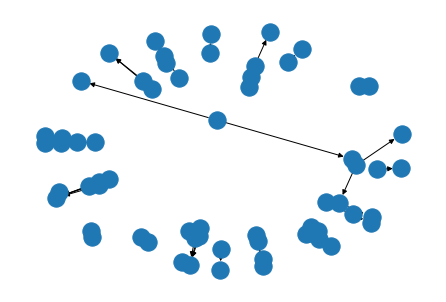

In [33]:
nx.draw(G,with_labels=False)